In [9]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np

In [106]:
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [10]:
def get_data():
    f = open("data.txt")
    all_data = []
    for l in f:
        vals = [x.strip() for x in l.split('|')]
        all_data.append(vals)
    return all_data

In [12]:
d = get_data()[2:]

In [131]:
print(d[0:5])

[['jkk22', 'Strings', 'Index/Slice', '02/11/2020 15:25:03', '1', '1'], ['jkk22', 'Strings', 'Split', '02/11/2020 15:25:03', '1', '1'], ['bmh58', 'Lists', 'Adding', '02/11/2020 15:30:41', '0', '3'], ['bmh58', 'Lists', 'Adding', '02/11/2020 15:32:04', '3', '3'], ['bmh58', 'Lists', 'Adding', '02/11/2020 15:32:47', '7', '7']]


In [13]:
class Quiz:
    def __init__(self):
        self.name = ''
        self.time = ''
        self.concepts = []
        self.corr_ques = 0
        self.num_ques = 0
    def print(self):
        print("Name:", self.name, "Time:", self.time, "NumConcepts", len(self.concepts), self.corr_ques, self.num_ques)

In [14]:
class Session:
    def __init__(self):
        self.name = ''
        self.quizzes = []
    

In [15]:
curr_quiz = Quiz()
quizzes = []
first = True
for row in d:
    if curr_quiz.name != row[0] or curr_quiz.time != row[3]:
        if first:
            first = False
        else:
            quizzes.append(curr_quiz)
        curr_quiz = Quiz()
        curr_quiz.name = row[0]
        curr_quiz.time = row[3]
    curr_quiz.concepts.append((row[1], row[2]))
    curr_quiz.corr_ques += int(row[4])
    curr_quiz.num_ques += int(row[5])

In [16]:
first = True
sessions = []
for q in quizzes:
    if first:
        first = False
        curr_sess = Session()
        curr_sess.name = q.name
        continue
    if (q.name != curr_sess.name) or timedelta(datetime.strptime(q.time, '%m/%d/%Y %H:%M:%S') - datetime.strptime(curr_sess.quizzes[-1].time, '%m/%d/%Y %H:%M:%S') > timedelta(minutes = 15)):
        sessions.append(curr_sess)
        curr_sess = Session()
        curr_sess.name = q.name
    curr_sess.quizzes.append(q)
sessions = sessions[1:]
print("Total number of sessions:", len(sessions))


Total number of sessions: 365


In [66]:
count = 0
t = 0
length_long_sessions = []
for s in sessions:
    if len([q.time for q in s.quizzes]) > 1:
        count += 1
        length_long_sessions.append(len(s.quizzes))
    if len([q.time for q in s.quizzes]) == 1:
        t += 1
        #print(s.quizzes[0].num_ques)
print("Total number of quizzes:", len(quizzes))
print("Number of sessions:", len(sessions))
print("Number of sessions with 2 or more quizzes:", count)
print("Average number of quizzes in sessions with >= 2 quizzes:", sum([len(s.quizzes) for s in sessions])/count)
print("Number of sessions with 1 quiz:", t)
    #print(s.name, [q.time for q in s.quizzes])

Total number of quizzes: 860
Number of sessions: 365
Number of sessions with 2 or more quizzes: 143
Average number of quizzes in sessions with >= 2 quizzes: 5.986013986013986
Number of sessions with 1 quiz: 222


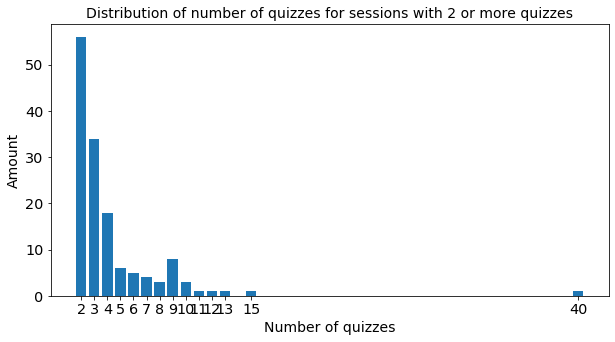

In [107]:
x = sorted(set(length_long_sessions))
x = x[:-1]
y = [length_long_sessions.count(i) for i in x]
plt.figure(figsize=(10,5))
plt.bar(x, y, tick_label = x)
plt.xlabel("Number of quizzes", fontsize = 14)
plt.ylabel("Amount", fontsize = 14)
plt.title("Distribution of number of quizzes for sessions with 2 or more quizzes", fontsize = 14)
plt.show()                                       

In [68]:
before = []
after = []
for s in sessions:
    if len(s.quizzes) > 1:
        before.append(s.quizzes[0].corr_ques/s.quizzes[0].num_ques)
        after.append(s.quizzes[-1].corr_ques/s.quizzes[-1].num_ques)
print("Average score on first quiz:", sum(before)/len(before))
print("Average score on last quiz:", sum(after)/len(after))

Average score on first quiz: 0.7938815497998958
Average score on last quiz: 0.8603653921835739


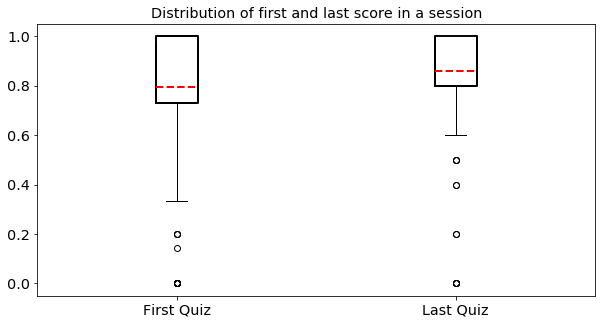

In [118]:
plt.figure(figsize = (10, 5))
boxprops = dict(linestyle='-', linewidth=2, color ='black')
meanlineprops = dict(linestyle='--', linewidth=2, color='red')
medprops = dict(color = "white", linewidth = 0.1)
plt.boxplot([before, after], showmeans = True, medianprops = medprops, meanline = True, meanprops = meanlineprops, boxprops = boxprops, labels = ["First Quiz", "Last Quiz"])
plt.title("Distribution of first and last score in a session")
plt.show()

In [100]:
scores = []
num_ques = []
for s in sessions:
    if len(s.quizzes) == 1:
        scores.append(s.quizzes[0].corr_ques/s.quizzes[0].num_ques)
        num_ques.append(s.quizzes[0].num_ques)
print("Average score when only taking one quiz:", sum(scores)/len(scores))
print("Average number of questions when only taking one quiz:", sum(num_ques)/len(num_ques))

Average score when only taking one quiz: 0.8190149797885734
Average number of questions when only taking one quiz: 10.32882882882883


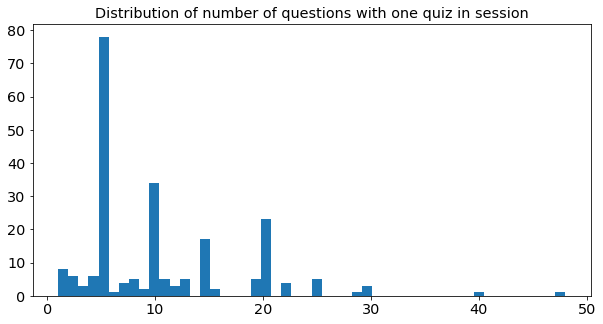

In [109]:
plt.title("Distribution of number of questions with one quiz in session")
plt.hist(num_ques, bins = 50)
plt.show()

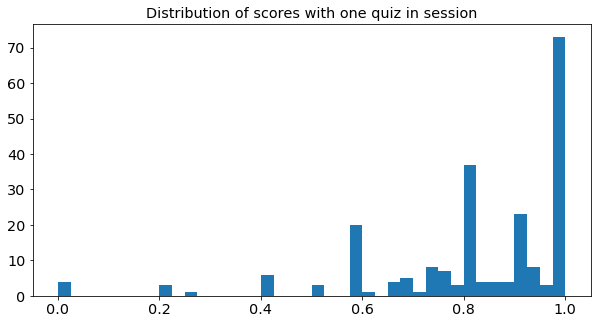

In [110]:
plt.title("Distribution of scores with one quiz in session")
plt.hist(scores, bins = 40)
plt.show()

In [111]:
dat = []
for i in range(2, 11):
    first = []
    second_last = []
    last = []
    for s in sessions:
        if len(s.quizzes) == i:
            first.append(s.quizzes[0].corr_ques/s.quizzes[0].num_ques)
            second_last.append(s.quizzes[-2].corr_ques/s.quizzes[-2].num_ques)
            last.append(s.quizzes[-1].corr_ques/s.quizzes[-1].num_ques)
    dat.append((sum(first)/len(first), sum(second_last)/len(second_last), sum(last)/len(last)))
new_dat = [(i[2] - i[0], i[2] - i[1]) for i in dat]


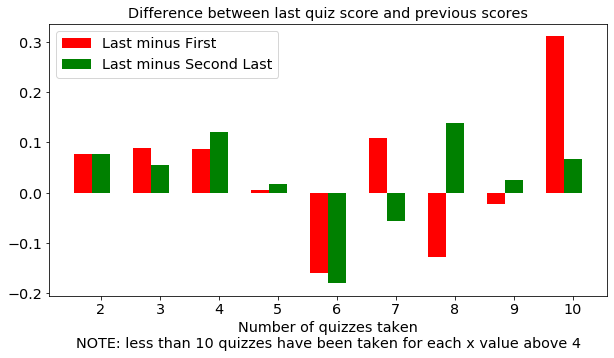

In [112]:
x = np.arange(2, 11)
y1 = [a for (a, b) in new_dat]
y2 = [b for (a, b) in new_dat]
plt.bar(x-0.3, y1, width=0.3, color='red', align='center')
plt.bar(x, y2, width=0.3, color='green', align='center')
plt.xticks(x)
plt.xlabel("Number of quizzes taken\nNOTE: less than 10 quizzes have been taken for each x value above 4")
plt.legend(["Last minus First", "Last minus Second Last"])
plt.title("Difference between last quiz score and previous scores")
plt.show()


In [72]:
two_conc = []
one_conc = []
for q in quizzes:
    
    if len(q.concepts) > 1:
        two_conc.append(q)
    else:
        one_conc.append(q)

print("Number of quizzes without interleaving:", len(one_conc))
print("Number of quizzes with interleaving:", len(two_conc))
total = 0
for q in two_conc:
    total += len(q.concepts)
print("Average number of concepts when using interleaving:", total/len(two_conc))

Number of quizzes without interleaving: 524
Number of quizzes with interleaving: 336
Average number of concepts when using interleaving: 5.375


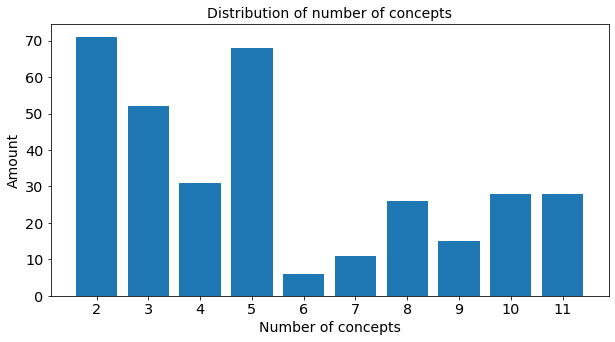

In [113]:
num_conc = []
for q in two_conc:
    num_conc.append(len(q.concepts))
x = sorted(set(num_conc))
y = [num_conc.count(i) for i in x]
plt.figure(figsize=(10,5))
plt.bar(x, y, tick_label = x)
plt.xlabel("Number of concepts", fontsize = 14)
plt.ylabel("Amount", fontsize = 14)
plt.title("Distribution of number of concepts", fontsize = 14)
plt.show()                    

In [74]:
non_int = []
for q in one_conc:
    if q.num_ques > 1:
        non_int.append(q.corr_ques/q.num_ques)
print("Average score without interleaving:",sum(non_int)/len(non_int))

use_int = []
for q in two_conc:
    if q.num_ques > 1:
        use_int.append(q.corr_ques/q.num_ques)
print("Average score with interleaving:",sum(use_int)/len(use_int))

Average score without interleaving: 0.8541800729300743
Average score with interleaving: 0.8366085352272489


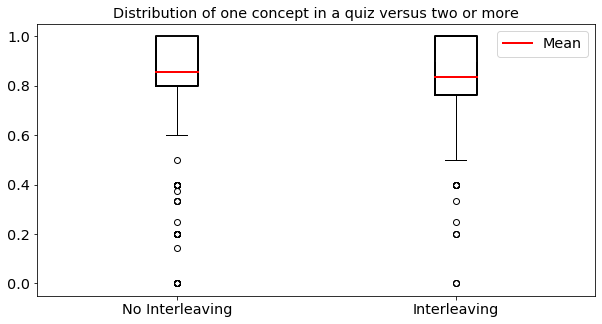

In [162]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='red', lw=2)]
plt.figure(figsize = (10, 5))
boxprops = dict(linestyle='-', linewidth=2, color ='black')
medprops = dict(color = "white", linewidth = 0.1)
meanlineprops = dict(linestyle = '-', linewidth=2, color='red')
plt.boxplot([non_int, use_int], showmeans = True, medianprops = medprops, meanline = True, meanprops = meanlineprops, boxprops = boxprops, labels = ["No Interleaving", "Interleaving"])
plt.title("Distribution of one concept in a quiz versus two or more")
plt.legend(custom_lines, ['Mean'])
plt.show()

In [142]:
def rolling_avg(alpha, data):
    if len(data) == 1:
        q_answered = sum([each[1] for each in data])
        if q_answered < 5:
            return (f"Too few answers ({q_answered})")
        return (data[0][0]/data[0][1], q_answered)
    q_answered = sum([each[1] for each in data])
    if q_answered < 5:
        return (f"Too few answers ({q_answered})")
    percent_before = sum([x[0] for x in data[:-1]])/sum([x[1] for x in data[:-1]])
    mastery = percent_before * (1 - alpha) + (alpha) * int(data[-1][0])/int(data[-1][1])
    return (mastery, q_answered)

In [143]:
d = get_data()[2:]
print(d[0:5])

[['jkk22', 'Strings', 'Index/Slice', '02/11/2020 15:25:03', '1', '1'], ['jkk22', 'Strings', 'Split', '02/11/2020 15:25:03', '1', '1'], ['bmh58', 'Lists', 'Adding', '02/11/2020 15:30:41', '0', '3'], ['bmh58', 'Lists', 'Adding', '02/11/2020 15:32:04', '3', '3'], ['bmh58', 'Lists', 'Adding', '02/11/2020 15:32:47', '7', '7']]


In [144]:
studentD = {}
for q in d:
    if (q[0], q[2]) not in studentD:
        studentD[(q[0], q[2])] = []
    studentD[(q[0], q[2])].append([int(q[4]), int(q[5])])


masteryD = {}
for k, v in studentD.items():
    masteryD[k] = rolling_avg(0.6, v)

In [164]:
cleaned = []
for k, v in masteryD.items():
    if type(v) is not str:
        cleaned.append(v)
print("Average mastery level after last quiz:", sum([x[0] for x in cleaned])/len(cleaned))

Average mastery level after last quiz: 0.8785944838401724


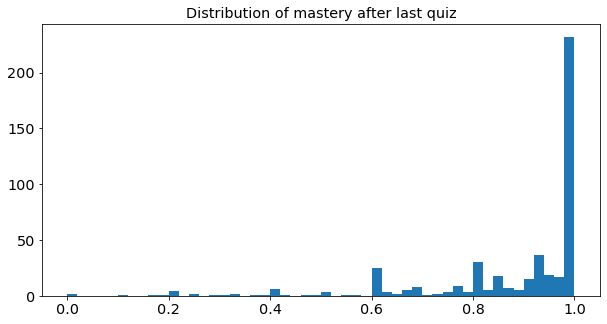

In [157]:
plt.title("Distribution of mastery after last quiz")
plt.hist([x[0] for x in cleaned], bins = 50)
plt.show()